# Recipe Site Traffic - predictions


**Data Validation:**
This dataset comprises 1090 rows and 8 columns. I have validated all variables, and below are the changes made in accordance with the given data requirements:

1. location: Validated to ensure uniqueness.
2. year_3_profit: This feature serves as the target variable, and no changes have been made.
3. local_pop: This feature contained 'Unknown' values, which have been replaced with the mean of the data.
4. competitors: No changes have been made; validation confirmed it as a positive integer.
5. nearest_fgh: No changes have been made; validation confirmed it as a positive integer.
6. hours: Since this is ordinal data, it has been mapped for preserve the order. Empty hours have been substituted with the most    frequent data.
7. highway: To comply with the requirement of a minimum time of one minute, negative values have been replaced with the mean.
8. drivethru: As an ordinal feature, 'No drivethru' has been replaced with 'No,' and the data has been transformed into binary (0 and 1).


In [1]:
# packages import 

import pandas as pd

df = pd.read_csv('restaurant_success.csv')

# 1. Location Code
# Validation: Ensure that location codes are integers.
df['location'] = pd.to_numeric(df['location'], errors='coerce')
df = df.dropna(subset=['location'])

# check to ensure there are no duplicate 
print("Number of duplicate entries in 'location' column:", df.duplicated(subset=['location']).sum())

# 2. Year 3 Profit
# Validation: To ensure that profit values are either 0 or 1.
df['year_3_profit'] = df['year_3_profit'].astype(int)
df = df[df['year_3_profit'].isin([0, 1])]

# 3. Local Population
# Validation: Ensure that local population values are numeric.
df['local_pop'] = pd.to_numeric(df['local_pop'], errors='coerce')
df['local_pop'].fillna(df['local_pop'].mean(), inplace=True)
df = df.dropna(subset=['local_pop'])
df['local_pop'] = df['local_pop'].astype(int)

# 4. Competitors
# Validation: Ensure that the number of competitors is non-negative.
df['competitors'] = df['competitors'].astype(int)
df = df[df['competitors'] >= 0]

# 5. Nearest FGH
# Validation: Ensure that distances are non-negative.
df['nearest_fgh'] = pd.to_numeric(df['nearest_fgh'], errors='coerce')
df = df.dropna(subset=['nearest_fgh'])
df = df[df['nearest_fgh'] >= 0]

# 6. Hours
# Empty hours have been substituted with the most    frequent data.
mode_hours = df['hours'].mode().iloc[0]
df['hours'].fillna(mode_hours, inplace=True)
hour_mapping = {'Regular': 0, 'Extended': 1, '24 hours': 2}
df['hours'] = df['hours'].map(hour_mapping)

# 7. Highway
# No specific validation for this column, but handled negative values
non_negative_mean = df['highway'][df['highway'] >= 0].mean()
df['highway'] = df['highway'].apply(lambda x: non_negative_mean if x < 0 else x)

# 8. Drivethru
# No specific validation for this column, but you might want to handle missing values.
df['drivethru'] = df['drivethru'].replace('No drivethru', 'No')
df['drivethru'] = df['drivethru'].replace({'No': 0, 'Yes': 1})

Number of duplicate entries in 'location' column: 0


**Exploratory Analysis**

1. Target Variable - year_3_profit
  - As we are trying to find out a restaurant location success.
2. I have investigated, and the location feature can be dropped as it serves as a unique identifier.
3. The local_pop has been scaled

In [2]:
# Drop the 'location' column as it is unique and independent feature
df = df.drop('location', axis=1)

import numpy as np
df['local_pop'] = np.log(df['local_pop'])

**Correlcation Between the columns**
 plotted the correlation between the variables, and found out that the variables are not much correlated

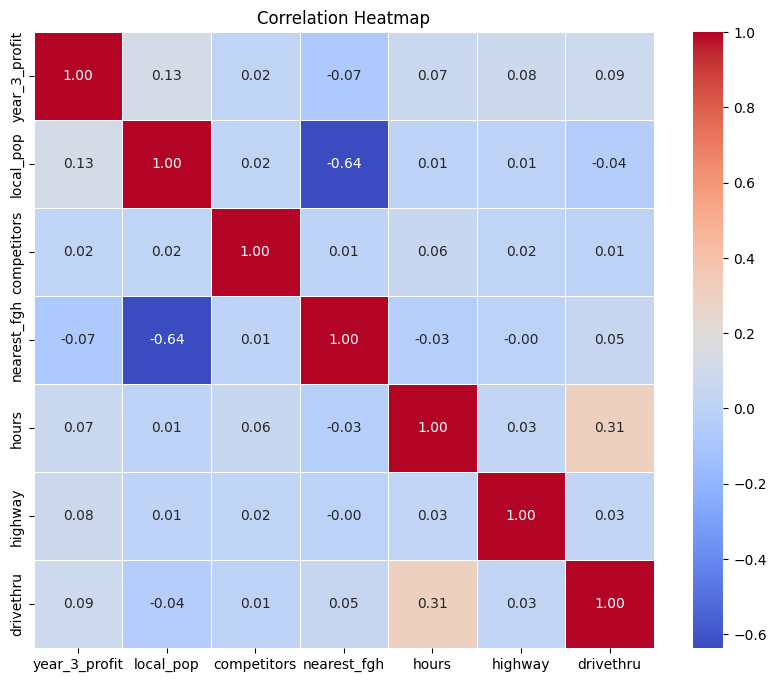

In [3]:
# Correlation between the columns 

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

    Sinlge variable graphs:
    1. Histogram of local_pop.
    2. Box plot of nearest_fgh, highway features

Multiple variable graphs:
1. Count plot showing the relationship between hours, count, and year_3_profit.
2. Scatter plot illustrating the relationship among competitors, local_pop, and year_3_profit.

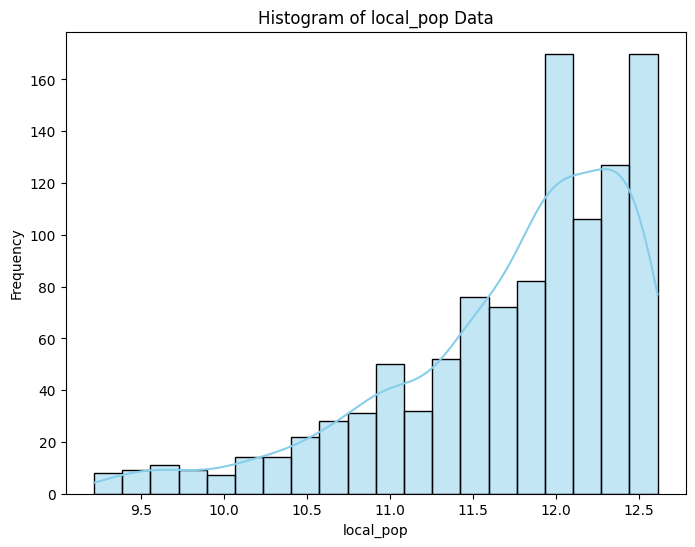

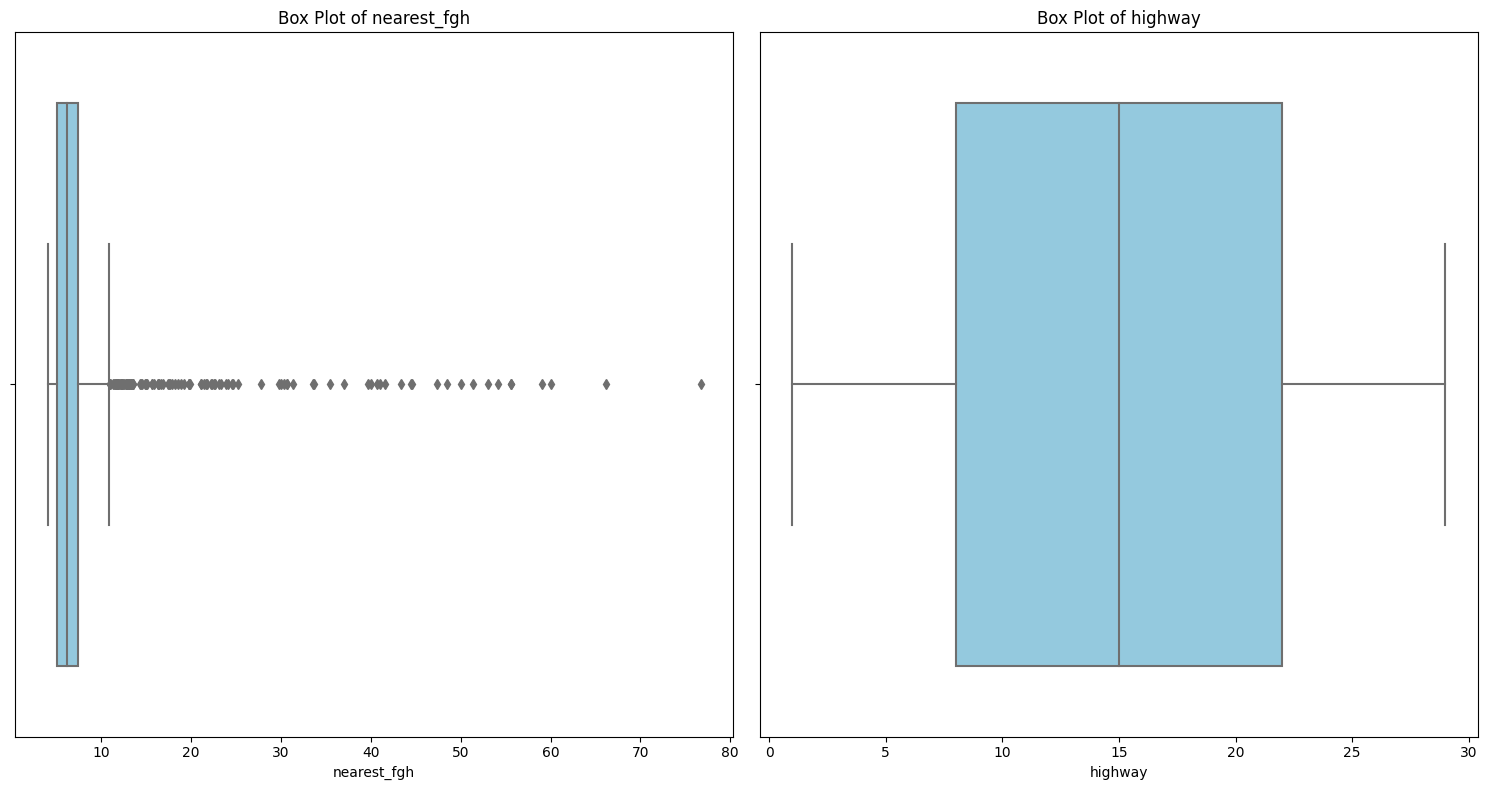

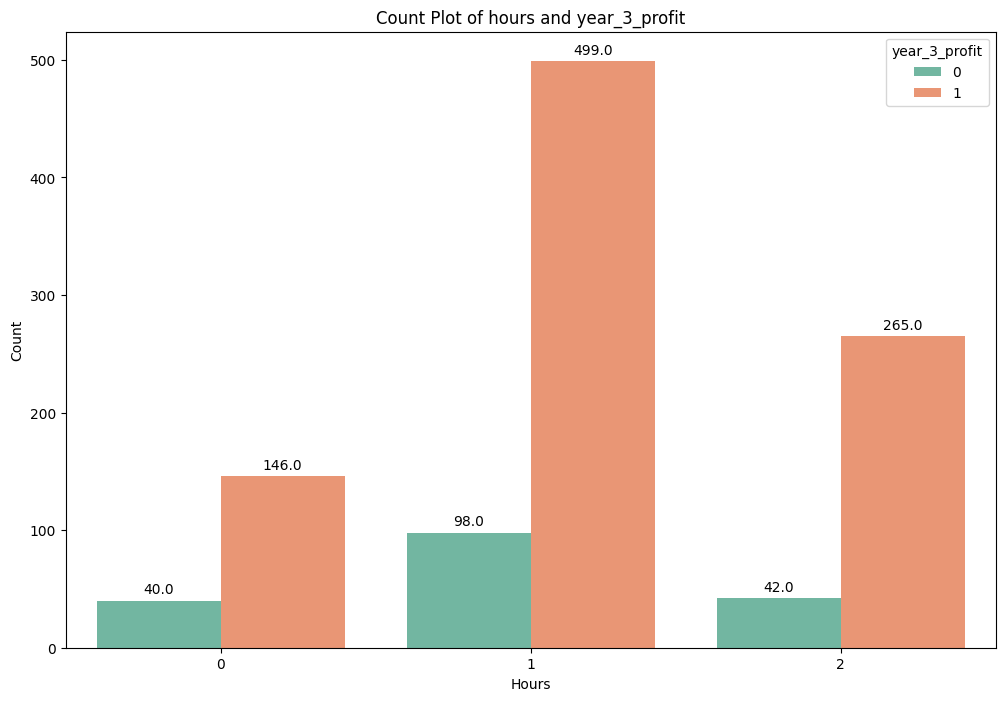

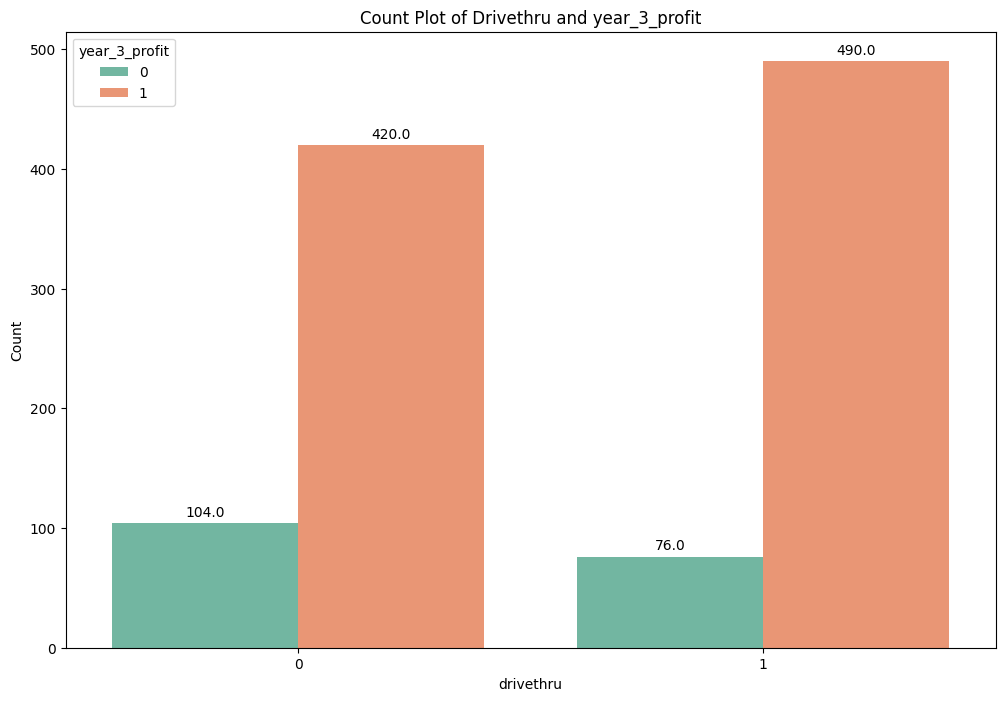

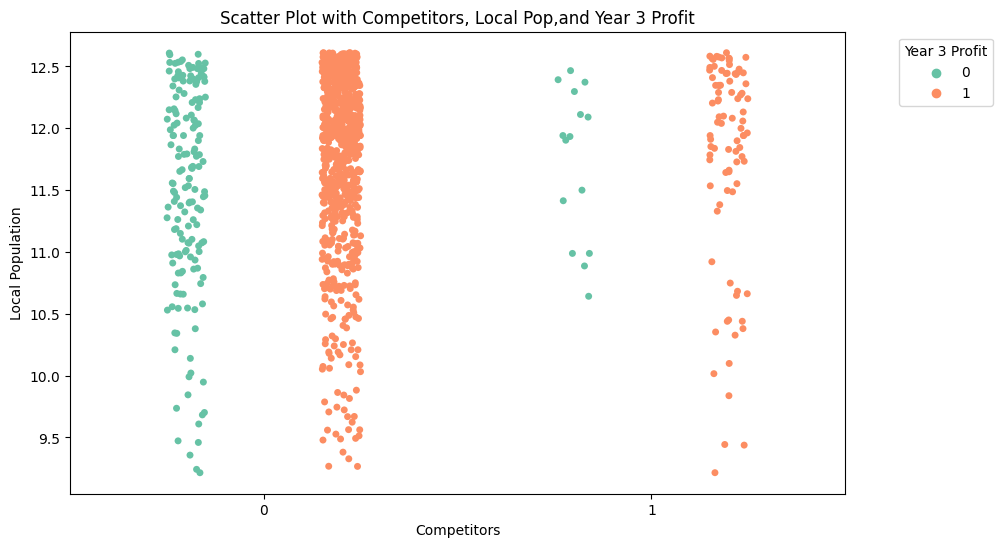

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# Single variable gaphs 
# Graph 1 - local_pop - histogram

plt.figure(figsize=(8, 6))
sns.histplot(df['local_pop'], kde=True, color='skyblue', bins=20)
plt.title('Histogram of local_pop Data')
plt.xlabel('local_pop')
plt.ylabel('Frequency')
plt.show()

# Graph 2 - Box plots for numerical variables
numerical_vars = ['nearest_fgh', 'highway']

plt.figure(figsize=(15, 8))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[var], color='skyblue')
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()


# Multiple variable graphs
# Graph1 - hours vs count vs year_3_profit
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='hours', hue='year_3_profit', data=df, palette='Set2', dodge=True)
plt.title('Count Plot of hours and year_3_profit')
plt.xlabel('Hours')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Graph2 - drivethru vs count histogram and the year_3_profit
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='drivethru', hue='year_3_profit', data=df, palette='Set2', dodge=True)
plt.title('Count Plot of Drivethru and year_3_profit')
plt.xlabel('drivethru')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


# Graph3 - competitors vs local_pop vs year_3_profit scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='competitors', y='local_pop', hue='year_3_profit', data=df, palette='Set2', dodge=True)
plt.title('Scatter Plot with Competitors, Local Pop,and Year 3 Profit')
plt.xlabel('Competitors')
plt.ylabel('Local Population')
plt.legend(title='Year 3 Profit', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


**Exploratory Analysis - Findings**

1. There are many outliers in the nearest_fgh feature.
2. The median distance from the fgh restaurant to the highway is approximately 15.
3. Stores with extended hours appear to be more profitable.
4. Drive-thru establishments seem to generate more profit than those without drive-thru.
5. Stores without competitors and with higher local populations seem to be more profitable.

## Model Fitting & Evaluation

1. It appears that we have a binary classification problem, as the target variable year_3_profit has two possible values: 0 or 1. In binary classification, we aim to predict a categorical outcome with two classes.
2. We have chosen logistic regression as the baseline. Considering the imbalanced class distribution indicated by the count of observations, we have addressed this class imbalance.Here, it seems that the profitable class is more prevalent, and misclassifying this class is more costly than the other.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score

X = df[['nearest_fgh','competitors', 'highway','drivethru','hours','local_pop']]
y = df['year_3_profit']

print(y.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Create a logistic regression model with class weights
model = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print('Logistic Regression Model accuracy',accuracy_score(y_test, y_pred))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

1    910
0    180
Name: year_3_profit, dtype: int64
Logistic Regression Model accuracy 0.5871559633027523
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.53      0.29        34
           1       0.87      0.60      0.71       184

    accuracy                           0.59       218
   macro avg       0.53      0.56      0.50       218
weighted avg       0.77      0.59      0.64       218

Logistic Regression Confusion Matrix:
[[ 18  16]
 [ 74 110]]


**Fitting a comparison model**

Model - Randomforest classification.
1. Chosen Random Forest model because the relationship between features and the target variable is nonlinear and complex,ans imbalanced datasets
2. The hyperparameters have been chosen for better accuracy.
3. Due to class imbalance, we have selected appropriate sampling techniques.
4. Plotted the feature importance to understand which features have a greater impact on profitability.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

rf_model = RandomForestClassifier(max_depth=None,
                                  max_features='log2',
                                  min_samples_leaf=4,
                                  min_samples_split=2,
                                  n_estimators=50,
                                  random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train the model
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)


# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
classification_rep = classification_report(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)

print(f'Random Forest Model Accuracy: {accuracy * 100:.2f}%')

print('Random Forest Classification Report:\n', classification_rep)

print('Random Forest Confusion Matrix:\n', conf_matrix)

Random Forest Model Accuracy: 92.66%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.97      0.95      0.96       184

    accuracy                           0.93       218
   macro avg       0.85      0.88      0.87       218
weighted avg       0.93      0.93      0.93       218

Random Forest Confusion Matrix:
 [[ 28   6]
 [ 10 174]]


**Model Evaluation**

Logistic Regression vs Random forest:

1. Random Forest is an ensemble learning method that combines multiple decision trees. This ensemble approach often results in more robust and accurate predictions, reducing overfitting compared to individual decision trees, hence the random forest should fit better than the baseline model logistic or any decion tree model
2. The KPI that can be choosen is accuracy. The accuracy of logistic regression is 58.7%, while the random forest achieves 92.6%.
3. Printing the classification metrics reveals that the ensemble random forest exhibits better precision, recall, and F1 score.

Definition of a metric for the business to monitor:
 The metrics we should monitor include model accuracy, precision, recall, and F1 score, as well as the importance of the features on which the target variable depends."

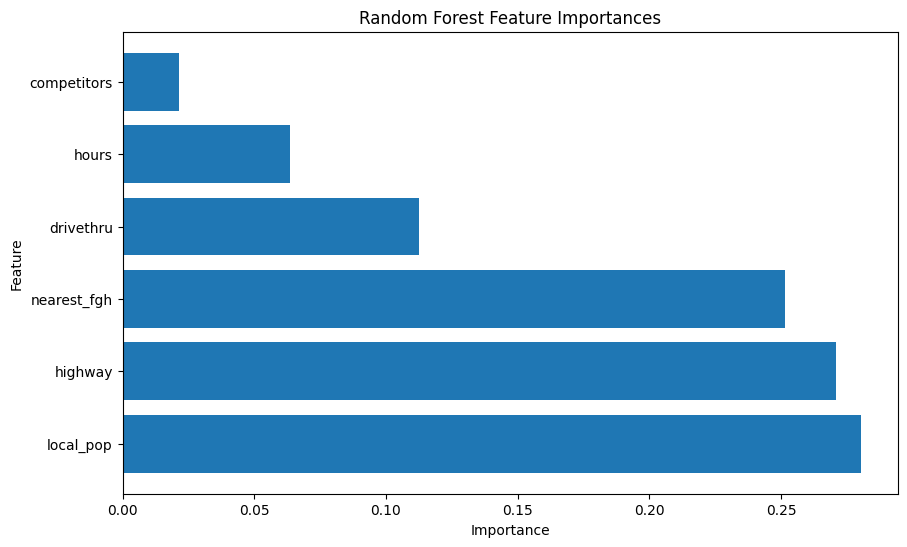

Feature Importances:
       Feature  Importance
5    local_pop    0.280195
2      highway    0.270658
0  nearest_fgh    0.251469
3    drivethru    0.112485
4        hours    0.063662
1  competitors    0.021530


In [7]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

# Display the sorted feature importances
print("Feature Importances:")
print(feature_importance_df)

Final Summary/Recommaondations:

1. The random forest model can be used to assess the profitability of a new restaurant, as it predicts with an accuracy of 92%.

2. The features have dependencies on local_pop (0.28), highway (0.27), and nearest_fgh (0.25). Choose a location with a higher local population, proximity to the highway, and greater distance from other FGH stores. Additionally, stores with extended hours,drivethru tend to be more profitable.

3. Continuously improve the model by collecting more data, performing feature engineering, and fine-tuning parameters.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation